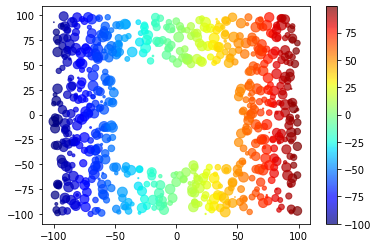

In [14]:
import matplotlib.pyplot as plt
import numpy as np

x=np.random.randint(-100, 100, 1000)  #-100 ~ 100 사이에서 1000개의 랜덤값 추출
y=np.random.randint(-100, 100, 1000)

mask1=abs(x)>50 #x에 저장된 값 중 절댓값이 50보다 큰 값 추출
mask2=abs(y)>50

x=x[mask1+mask2] #mask1과 mask2 하나라도 만족하는 값 저장
y=y[mask1+mask2]

size=np.random.rand(len(x))*100

plt.scatter(x, y, s=size, c=x, cmap='jet', alpha=0.7)
plt.colorbar()
plt.show()



C:\Users\q\AppData\Local\Temp/ipykernel_11812/278541021.py:26: RuntimeWarning: invalid value encountered in true_divide
  away = np.array(row[2:], dtype=int) / int(row[1])


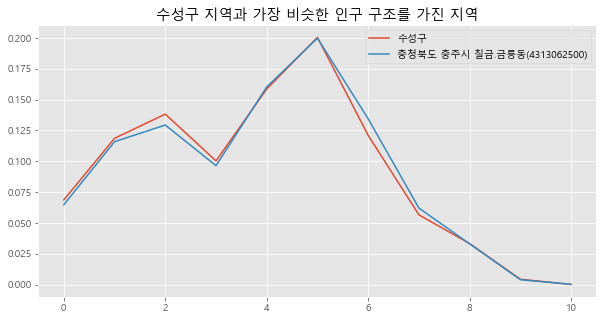

In [25]:
#우리동네와 인구구조가 가장 비슷한 동네를 찾는 코드
import numpy as np
import csv
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fm.get_fontconfig_fonts()

#데이터 읽어오기
f=open('C:\jupiterworkspace\pandas\data/age.csv')
data=csv.reader(f)
next(data)
data=list(data)

name = input('인구 구조가 알고싶은 지역의 이름(읍면동 단위)을 입력: ')
mn = 1  #오차의 최솟값
result_name = ''
result = 0  #가장 근사한 지역의 인구비율을 저장할 배열

#타겟지역의 인구구조 저장
for row in data:
    if name in row[0]:
        home = np.array(row[2:], dtype=int) / int(row[1])

#인구구조가 비슷한 지역 탐색
for row in data:
    away = np.array(row[2:], dtype=int) / int(row[1])
    s=np.sum((home-away)**2) #오차율
    if s<mn and name not in row[0]:
        mn=s
        result_name=row[0]
        result = away

plt.style.use('ggplot')
plt.figure(figsize=(10,5))
plt.rc('font', family='Malgun Gothic')
plt.title(name + ' 지역과 가장 비슷한 인구 구조를 가진 지역')
plt.plot(home, label=name)
plt.plot(result, label=result_name)
plt.legend()
plt.show()

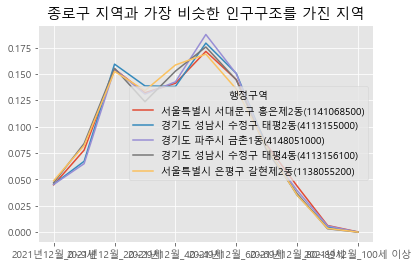

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
df = pd.read_csv('C:\jupiterworkspace\pandas\data/age.csv', encoding='cp949', index_col=0)
df = df.div(df['2021년12월_총인구수'], axis=0)
del df['2021년12월_총인구수']
#print(df.loc['경기도 송탄출장소 (4122200000)'])


#타겟지역의 인구 데이터프레임 추출
name = input('인구 구조가 알고싶은 지역의 이름(읍면동 단위)을 입력: ')
a = df.index.str.contains(name)
df2=df[a]

x=df.sub(df2.iloc[0], axis=1)
y=np.power(x, 2)
z=y.sum(axis=1)
z=z[z>0]
i=z.sort_values().index[:5]
df.loc[i].T.plot()

plt.title(name + ' 지역과 가장 비슷한 인구구조를 가진 지역')
plt.show()


